In [1]:
import os  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from scipy import stats

In [2]:
PATH = "D:\Datasets\MotionData\\"
actionTags = ['0Walking','1Sitting','2Standing','3Squating','4Lying']

In [3]:
def GetLeftRightCode(path):
    _lrcode = []
    lrcode = []
    for line in open(path,'r'):
        _lrcode.append(line)
    for i in range(len(_lrcode)):
        lrcode.append(_lrcode[i][7:-2])
    return lrcode
#print GetLeftRightCode("D:\Datasets\MotionData\MotionDataB\wb_pos_info.txt")

In [4]:
def SaveFig(motion_data, subject, num, lrcode, action):
    l_ing_data_x = []
    r_ing_data_x = []
    l_ing_data_y = []
    r_ing_data_y = []
    l_ing_data_z = []
    r_ing_data_z = []
    for i in range(data.shape[0]):
         if motion_data[i][6] == action[1:]:
                if motion_data[i][2] == lrcode[0]: 
                    l_ing_data_x.append(motion_data[i][3])
                    l_ing_data_y.append(motion_data[i][4])
                    l_ing_data_z.append(motion_data[i][5])
                elif motion_data[i][2] == lrcode[1]:
                    r_ing_data_x.append(motion_data[i][3])
                    r_ing_data_y.append(motion_data[i][4])
                    r_ing_data_z.append(motion_data[i][5])
    print("Subject: %s Num: %s Action: %s Left: %d Right: %d" % (subject[-1], num[-5],action, len(l_ing_data_x), len(r_ing_data_x)))
    f1 = plt.figure(1, dpi=300)
    plt.plot(np.arange(len(l_ing_data_x)),l_ing_data_x, 'C3', label='x')#red
    plt.plot(np.arange(len(l_ing_data_y)),l_ing_data_y, 'C2', label='y')#green
    plt.plot(np.arange(len(l_ing_data_z)),l_ing_data_z, 'C0', label='z')#blue
    plt.title('{}{}{}{}' .format(subject[-1], num[-5], 'Left', action))
    plt.savefig(PATH+subject+'\\'+'{}{}{}{}.png' .format(subject[-1], num[-5], 'Left', action))
    f2 = plt.figure(2, dpi=300)
    plt.plot(np.arange(len(r_ing_data_x)),r_ing_data_x, 'C3', label='x')#red
    plt.plot(np.arange(len(r_ing_data_y)),r_ing_data_y, 'C2', label='y')#green
    plt.plot(np.arange(len(r_ing_data_z)),r_ing_data_z, 'C0', label='z')#blue
    plt.title('{}{}{}{}' .format(subject[-1], num[-5], 'Right', action))
    plt.savefig(PATH+subject+'\\'+'{}{}{}{}.png' .format(subject[-1], num[-5], 'Right', action))
    plt.close('all')
    return 0

In [5]:
subjects = os.listdir(PATH)

In [ ]:
def SegmentData(motion_data, seg_size, action, lrcode):
    segments = np.empty((0,seg_size,3))
    labels = np.empty((0))
    l_ing_data_x,l_ing_data_y,l_ing_data_z = [],[],[]   
    r_ing_data_x,r_ing_data_y,r_ing_data_z = [],[],[]  
    for i in range(len(motion_data)):
        if motion_data[i][6] == action:
            if motion_data[i][2] == lrcode[0]: 
                l_ing_data_x.append(motion_data[i][3])
                l_ing_data_y.append(motion_data[i][4])
                l_ing_data_z.append(motion_data[i][5])
            elif motion_data[i][2] == lrcode[1]:
                r_ing_data_x.append(motion_data[i][3])
                r_ing_data_y.append(motion_data[i][4])
                r_ing_data_z.append(motion_data[i][5])

    _start = 0
    _end = seg_size/2
    
    for j in range(len(l_ing_data_x)):   

        _end = _end + seg_size/2
        if _end <= len(l_ing_data_x):
            _x = l_ing_data_x[_start:_end]
            _y = l_ing_data_y[_start:_end]
            _z = l_ing_data_z[_start:_end]
            segments = np.vstack([segments, np.dstack([_x,_y,_z])])#3xseg_size
            labels = np.append(labels, action)
            _start = _start + seg_size/2
        else:
            break
    
    _start = 0
    _end = seg_size/2
    
    for j in range(len(r_ing_data_x)):   

        _end = _end + seg_size/2
        if _end <= len(r_ing_data_x):
            _x = r_ing_data_x[_start:_end]
            _y = r_ing_data_y[_start:_end]
            _z = r_ing_data_z[_start:_end]
            segments = np.vstack([segments, np.dstack([_x,_y,_z])])#3xseg_size
            labels = np.append(labels, action)
            _start = _start + seg_size/2
        else:
            break
    
    return segments, labels

In [6]:
def AverageFilter(l, windowsize):#list windowsize default is 3,if change needs to change weights and N
    _l = []
    N = (windowsize-1)/2
    for i in range(len(l)):
        if i >= N and i <= len(l)-1-N:
            _l.append(np.average(l[i-N:i+N+1],weights=[1 for j in range(windowsize)]))
        else:
            _l.append(l[i])
    return _l

In [22]:
def AveragedSegmentData(motion_data, seg_size, action, lrcode):
    #segments = np.empty((0,seg_size,3))
    segments = np.empty((0,seg_size*3))
    labels = np.empty((0))
    l_ing_data_x,l_ing_data_y,l_ing_data_z = [],[],[]   
    r_ing_data_x,r_ing_data_y,r_ing_data_z = [],[],[]  
    for i in range(len(motion_data)):
        if motion_data[i][6] == action:
            if motion_data[i][2] == lrcode[0]: 
                l_ing_data_x.append(motion_data[i][3])
                l_ing_data_y.append(motion_data[i][4])
                l_ing_data_z.append(motion_data[i][5])
            elif motion_data[i][2] == lrcode[1]:
                r_ing_data_x.append(motion_data[i][3])
                r_ing_data_y.append(motion_data[i][4])
                r_ing_data_z.append(motion_data[i][5])

    al_ing_data_x = AverageFilter(l_ing_data_x,11)
    #print(al_ing_data_x)
    al_ing_data_y = AverageFilter(l_ing_data_y,11)
    al_ing_data_z = AverageFilter(l_ing_data_z,11)
    ar_ing_data_x = AverageFilter(r_ing_data_x,11)
    ar_ing_data_y = AverageFilter(r_ing_data_y,11)
    ar_ing_data_z = AverageFilter(r_ing_data_z,11)
    _start = 0
    _end = seg_size/2
    for j in range(len(l_ing_data_x)):   

        _end = _end + seg_size/2
        if _end <= len(l_ing_data_x):
            _x = al_ing_data_x[_start:_end]
            _y = al_ing_data_y[_start:_end]
            _z = al_ing_data_z[_start:_end]
            #segments = np.vstack([segments, np.dstack([_x,_y,_z])])#3xseg_size
            segments = np.vstack([segments, _x+_y+_z])
            labels = np.append(labels, action)
            _start = _start + seg_size/2
        else:
            break
    
    _start = 0
    _end = seg_size/2
    
    for j in range(len(r_ing_data_x)):   

        _end = _end + seg_size/2
        if _end <= len(r_ing_data_x):
            _x = ar_ing_data_x[_start:_end]
            _y = ar_ing_data_y[_start:_end]
            _z = ar_ing_data_z[_start:_end]
            #segments = np.vstack([segments, np.dstack([_x,_y,_z])])#3xseg_size need to change as segments = np.empty((0,seg_size,3))
            segments = np.vstack([segments, _x+_y+_z])#seg_size+seg_size+seg_size
            labels = np.append(labels, action)
            _start = _start + seg_size/2
        else:
            break
    
    return segments, labels

In [23]:
seg_size = 256
X = np.empty((0, seg_size, 3))
Y = np.empty((0))
for subject in subjects:
    nums = os.listdir(PATH+subject+'\\')
    for num in nums:
        if num[0] =='L':
            csvPATH = PATH+subject+'\\'+'LabelledData{}{}.csv'.format(subject[-1], num[-5])
            print("in {}".format(csvPATH))
            data = pd.read_csv(csvPATH)
            lrcode = GetLeftRightCode(PATH+subject+'\\'+'wb_pos_info.txt')
            motion_data = []# 0 time w_id x y z activies
            for i in range(data.shape[0]):
                motion_data.append(map(lambda x : x, data.iloc[i]))
            for action in actionTags:
                segments, labels = AveragedSegmentData(motion_data, seg_size, action[1:], lrcode)
                print len(labels)
                X = np.append(X, segments)
                Y = np.append(Y, labels)#label walking

in D:\Datasets\MotionData\MotionDataA\LabelledDataA0.csv
52
14
14
2
13
in D:\Datasets\MotionData\MotionDataA\LabelledDataA1.csv
15
16
14
2
11
in D:\Datasets\MotionData\MotionDataA\LabelledDataA2.csv
17
14
12
2
11
in D:\Datasets\MotionData\MotionDataA\LabelledDataA3.csv
6
23
14
2
13
in D:\Datasets\MotionData\MotionDataA\LabelledDataA4.csv
13
15
14
2
12
in D:\Datasets\MotionData\MotionDataA\LabelledDataA5.csv
13
13
19
2
14
in D:\Datasets\MotionData\MotionDataA\LabelledDataA6.csv
14
14
11
2
13
in D:\Datasets\MotionData\MotionDataA\LabelledDataA7.csv
10
27
14
0
14
in D:\Datasets\MotionData\MotionDataA\LabelledDataA8.csv
14
13
14
2
3
in D:\Datasets\MotionData\MotionDataB\LabelledDataB0.csv
4
16
13
2
14
in D:\Datasets\MotionData\MotionDataB\LabelledDataB1.csv
2
15
14
2
12
in D:\Datasets\MotionData\MotionDataB\LabelledDataB2.csv
8
16
14
2
9
in D:\Datasets\MotionData\MotionDataB\LabelledDataB3.csv
0
16
14
2
14
in D:\Datasets\MotionData\MotionDataB\LabelledDataB4.csv
10
16
14
2
9
in D:\Datasets

In [24]:
print X.shape

(4308480L,)


(4308480L,)
(4308480L,)
(5610L,)


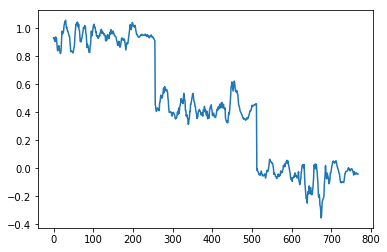

In [25]:
print X.shape
X_reshape = X.reshape(-1,256*3)
print X.shape
print Y.shape
fig = plt.figure()
plt.plot( X_reshape[6])
plt.show()

In [26]:
np.save(PATH+'averaged256x3X.npy', X_reshape)
np.save(PATH+'averaged256x3Y.npy', Y)

In [27]:
_X = np.load('D:\Datasets\\averaged256x3X.npy')
_Y = np.load('D:\Datasets\\averaged256x3Y.npy')

In [29]:
train_test_split = np.random.rand(len(_X)) < 0.7
train_x = _X[train_test_split]
train_y = _Y[train_test_split]
test_x = _X[~train_test_split]
test_y = _Y[~train_test_split]

In [37]:
print test_y.shape 
print train_x.shape
j = 0
for i in range(test_y.shape[0]):
    if test_y[i] == 'Walking':
        j+=1
print j

(1692L,)
(3918L, 768L)
356
